In [1]:
using Pkg

In [2]:
using Interact

HTML{String}("    <script id=\"webio-setup-11989119815865845427\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-2161398334839964981\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-11989119815865845427\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (window.require && require.defined) {\n            // Jupyter notebook.\n            if (require.defined(\"nbextensions/webio/main\")\n                    || require.defined(\"/assetserver/9cbd2f2b47933aba5c76df04bb81e10cd93f391e-dist/main.js\")) {\n                // Extension already loaded.\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/9cbd2f2b47933aba5c76df04bb81e10cd93f391e-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-2161398334839964981\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

In [3]:
using Plots

In [4]:
using ODE

In [5]:
function duffingsEquations(a,b,w)
    f = function(t,r)
    (x, y) = r
    
    dx_dt = y 
    dy_dt = x - x^3 - a*y + b*cos(w*t)
    
    [dx_dt; dy_dt]
    end
    return f
end

duffingsEquations (generic function with 1 method)

In [6]:
dt = 0.001
tf = 100.0
t  = collect(0:dt:tf) # time

r0 = [0.1; 0.0] # starting point

a = 0.25
b = 0.3
w = 1

f = duffingsEquations(a,b,w)

#3 (generic function with 1 method)

In [7]:
(time, pos) = ode23(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)

102405-element Array{Float64,1}:
 0.0                  
 0.0003989501596019789
 0.0007978006941237776
 0.0011672303256948587
 0.0011965516879204018
 0.0015952033882755288
 0.001993756000876503 
 0.0023922096071176935
 0.0027905642883934707
 0.003188820126098203 
 0.00358697720162626  
 0.003985035596372012 
 0.004382995391729829 
 ⋮                    
 0.17034648357823473  
 0.17041321058161668  
 0.1704798177139257   
 0.17054630485086358  
 0.17061267186813225  
 0.1706789186414364   
 0.1707450450464779   
 0.1708110509589586   
 0.17087693625458328  
 0.17094270080905374  
 0.1710083444980719   
 0.17107386719734244  

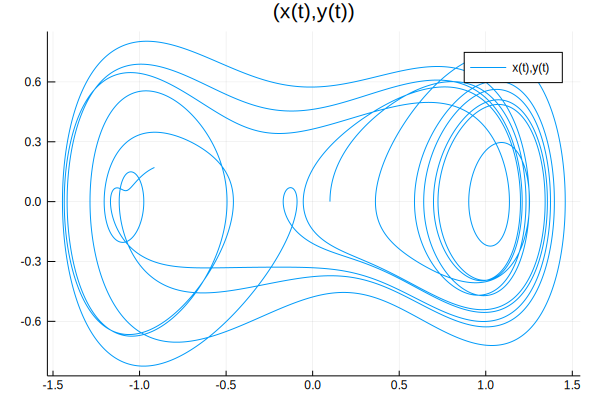

In [8]:
plot(x,y,title="(x(t),y(t))",label="x(t),y(t)")

In [9]:
len = length(t)

100001

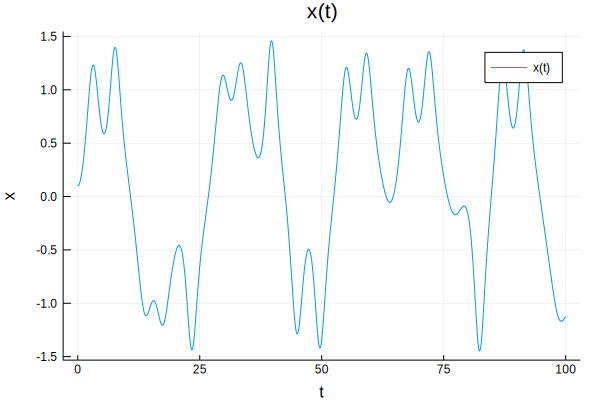

In [10]:
plot(t,x[1:len],title="x(t)",ylabel="x",xlabel="t",label="x(t)")

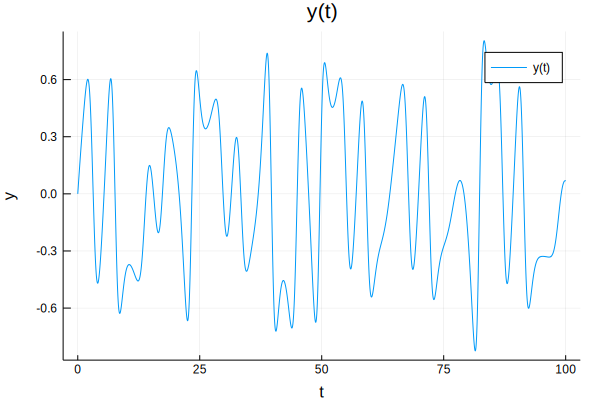

In [11]:
plot(t,y[1:len],title="y(t)",ylabel="y",xlabel="t",label="y(t)")

In [12]:
function duffingsAttractor(dt, tf, a, b, w)
    t  = collect(0:float(dt):float(tf))
    r0 = [0.1; 0.0]
    f = duffingsEquations(a,b,w)
    (t, pos) = ode23(f, r0, t)
    x = map(v -> v[1], pos)
    y = map(v -> v[2], pos)
    plot(x,y)
end

duffingsAttractor (generic function with 1 method)

In [13]:
@manipulate for dt in 0.001:0.001:0.01, tf in 10.0:250.0,
    a in 0:0.05:1, b in 0.0:0.05:1, w in 0.0:0.25:5.0
    duffingsAttractor(dt,tf,a,b,w)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:dt=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
5,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.001", "0.002", "0.003", "0.004", "0.005", "0.006", "0.007", "0.008", "0.009", "0.01"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.005",:value=>Observable{Float64} with 2 listeners. Value:
0.005), Observable{Float64} with 2 listeners. Value:
0.005, Scope("knockout-component-02b99772-7d36-4e37-a2ce-5e4375973b8c", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["dt"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.001", "0.002", "0.003", "0.004", "0.005", "0.006", "0.007", "0.008", "0.009", "0.01"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.005", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBase/Q4IkI/src/../assets/all.js", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBase/Q4IkI/src/../assets/style.css", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, conte

In [14]:
function xT(dt, tf, a, b, w)
    t  = collect(0:float(dt):float(tf))
    r0 = [0.1; 0.0]
    f = duffingsEquations(a,b,w)
    (t, pos) = ode23(f, r0, t)
    x = map(v -> v[1], pos)
    lenT = length(t)
    plot(t,x[1:lenT],title="x(t)",ylabel="x",xlabel="t",label="x(t)")
end

xT (generic function with 1 method)

In [15]:
function yT(dt, tf, a, b, w)
    t  = collect(0:float(dt):float(tf))
    r0 = [0.1; 0.0]
    f = duffingsEquations(a,b,w)
    (t, pos) = ode23(f, r0, t)
    y = map(v -> v[2], pos)
    lenT = length(t)
    plot(t,y[1:lenT],title="x(t)",ylabel="y",xlabel="t",label="y(t)")
end

yT (generic function with 1 method)

In [16]:
@manipulate for dt in 0.001:0.001:0.01, tf in 10.0:250.0,
    a in 0:0.05:1, b in 0.0:0.05:1, w in 0.0:0.25:5.0
    xT(dt,tf,a,b,w)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:dt=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
5,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.001", "0.002", "0.003", "0.004", "0.005", "0.006", "0.007", "0.008", "0.009", "0.01"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.005",:value=>Observable{Float64} with 2 listeners. Value:
0.005), Observable{Float64} with 2 listeners. Value:
0.005, Scope("knockout-component-fd9308ea-4fdd-47cb-8795-5c8f0cca54e2", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["dt"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.001", "0.002", "0.003", "0.004", "0.005", "0.006", "0.007", "0.008", "0.009", "0.01"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.005", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBase/Q4IkI/src/../assets/all.js", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBase/Q4IkI/src/../assets/style.css", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, conte

In [17]:
@manipulate for dt in 0.001:0.001:0.01, tf in 10.0:250.0,
    a in 0:0.05:1, b in 0.0:0.05:1, w in 0.0:0.25:5.0
    yT(dt,tf,a,b,w)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:dt=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
5,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.001", "0.002", "0.003", "0.004", "0.005", "0.006", "0.007", "0.008", "0.009", "0.01"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.005",:value=>Observable{Float64} with 2 listeners. Value:
0.005), Observable{Float64} with 2 listeners. Value:
0.005, Scope("knockout-component-1ac63901-dabb-4491-985b-d1638e26d2fb", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["dt"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.001", "0.002", "0.003", "0.004", "0.005", "0.006", "0.007", "0.008", "0.009", "0.01"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.005", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBase/Q4IkI/src/../assets/all.js", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBase/Q4IkI/src/../assets/style.css", "/Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, conte